#$Imports$

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

#$Data$

In [13]:
data = pd.read_csv("bmi.csv")

In [14]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


##$Categorical$ $Data$

In [15]:
gender_labs = {"Male":0,"Female":1}
data["Gender"] = data["Gender"].map(gender_labs)
data.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


##$Null$ $Values$

In [16]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

Greate!!, there is `no null value`.

#$Feature$ $Selection$

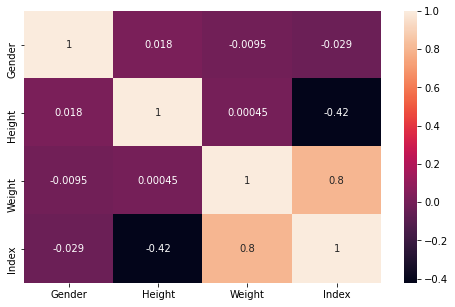

In [17]:
data_corr = data.corr()
plt.figure(figsize=(8,5))
sns.heatmap(data_corr,annot=True)
plt.show()

#$Data$ $splitting$

In [18]:
Y_data = data.pop("Index")
X_data = data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.33)

In [19]:
print(f"Train Shape : {X_train.shape}, Test Shape : {X_test.shape}")

Train Shape : (335, 3), Test Shape : (165, 3)


#$Models$

In [22]:
from sklearn.linear_model import LinearRegression # This generally work as a BaseLine
LR = LinearRegression()
LR.fit(X_train,Y_train)
y_pred = LR.predict(X_test)
r2_LR = r2_score(Y_test,y_pred)
RMSE_LR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f" R2 : {r2_LR} RMSE : {RMSE_LR}")

 R2 : 0.8270814906681658 RMSE : 0.5463337166395628


In [30]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
PR = Pipeline([
    ("SC",StandardScaler()), # This doesn't made much difference
    ("PF",PolynomialFeatures(degree=3)), # I tweaked the Degree 
    ("LR",LinearRegression())
])
PR.fit(X_train,Y_train)
y_pred = PR.predict(X_test)
r2_PR = r2_score(Y_test,y_pred)
RMSE_PR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f" R2 : {r2_PR} RMSE : {RMSE_PR}")

 R2 : 0.9451739993151501 RMSE : 0.307631317638001


In [37]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=None,min_samples_leaf=5) # I tried many combinations but all of them just moved arounf the same scores
DTR.fit(X_train,Y_train)
y_pred = DTR.predict(X_test)
r2_DTR = r2_score(Y_test,y_pred)
RMSE_DTR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f" R2 : {r2_DTR} RMSE : {RMSE_DTR}")

 R2 : 0.8789983248693783 RMSE : 0.4570176295530147


In [48]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf",degree=3,C=7.0) # Increasing the C will make it more linear
svr.fit(X_train,Y_train)
y_pred = svr.predict(X_test)
r2_svr = r2_score(Y_test,y_pred)
RMSE_svr = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f" R2 : {r2_svr} RMSE : {RMSE_svr}")

 R2 : 0.9407063676365223 RMSE : 0.31991992566146127


In [49]:
from sklearn.model_selection import GridSearchCV

In [51]:
svr_gs = SVR()
GSCV = GridSearchCV(estimator=svr_gs,param_grid={"kernel":["rbf","linear"],"degree":[1,2,3],"C":[1,3,5,7,10]},cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 3, 5, 7, 10], 'degree': [1, 2, 3],
                         'kernel': ['rbf', 'linear']})

In [52]:
GSCV.best_params_

{'C': 10, 'degree': 1, 'kernel': 'rbf'}

In [54]:
GSCV.best_score_

0.9383882380598019

In [55]:
svr_gs = GSCV.best_estimator_
svr_gs.fit(X_train,Y_train)
y_pred = svr_gs.predict(X_test)
r2_svr_gs = r2_score(Y_test,y_pred)
RMSE_svr_gs = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f" R2 : {r2_svr_gs} RMSE : {RMSE_svr_gs}")

 R2 : 0.9418361252954244 RMSE : 0.31685745320518194


I prefer the `normal` one as it didn't made much difference and this `high value` of $C$ doesn't makes me `feel comfortable`.

In [68]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(min_samples_leaf=5,max_depth=6) # This was certainly the best parameter I founded
RFR.fit(X_train,Y_train)
y_pred = RFR.predict(X_test)
r2_RFR = r2_score(Y_test,y_pred)
RMSE_RFR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f" R2 : {r2_RFR} RMSE : {RMSE_RFR}")

 R2 : 0.9206721155896644 RMSE : 0.37004130015345355


#$Model$ $Comparison$

In [107]:
models = ["LR","PR","DTR","SVR","SVR_GS","RFR"]
r2s = [r2_LR,r2_PR,r2_DTR,r2_svr,r2_svr_gs,r2_RFR]
rmses = [RMSE_LR,RMSE_PR,RMSE_DTR,RMSE_svr,RMSE_svr_gs,RMSE_RFR]
max_r2, min_r2 = np.max(r2s), np.min(r2s)
max_rmse, min_rmse = np.max(rmses), np.min(rmses)

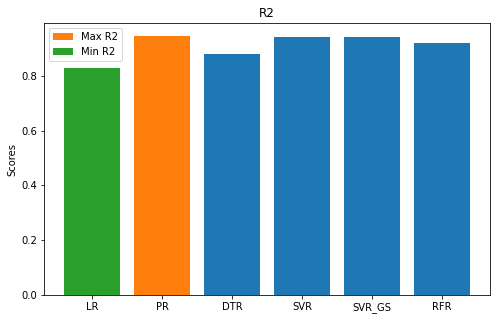

In [108]:
plt.figure(figsize=(8,5))
plt.bar(models,r2s)
plt.bar(models[r2s.index(max_r2)],max_r2,label="Max R2")
plt.bar(models[r2s.index(min_r2)],min_r2,label="Min R2")
plt.title("R2")
plt.ylabel("Scores")
plt.legend()
plt.show()

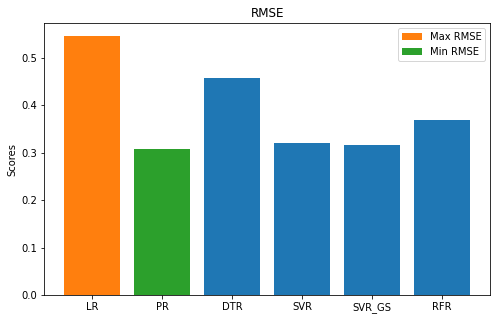

In [109]:
plt.figure(figsize=(8,5))
plt.bar(models,rmses)
plt.bar(models[rmses.index(max_rmse)],max_rmse,label="Max RMSE")
plt.bar(models[rmses.index(min_rmse)],min_rmse,label="Min RMSE")
plt.title("RMSE")
plt.ylabel("Scores")
plt.legend()
plt.show()

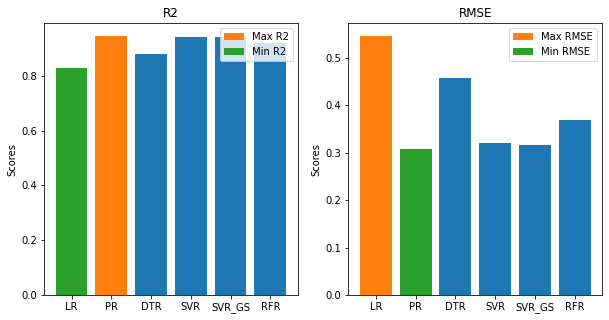

In [111]:
f, (ax1,ax2) = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(10)

ax1.bar(models,r2s)
ax1.bar(models[r2s.index(max_r2)],max_r2,label="Max R2")
ax1.bar(models[r2s.index(min_r2)],min_r2,label="Min R2")
ax1.set_title("R2")
ax1.set_ylabel("Scores")
ax1.legend()

ax2.bar(models,rmses)
ax2.bar(models[rmses.index(max_rmse)],max_rmse,label="Max RMSE")
ax2.bar(models[rmses.index(min_rmse)],min_rmse,label="Min RMSE")
ax2.set_title("RMSE")
ax2.set_ylabel("Scores")
ax2.legend()
plt.show()

Clearly, $Polynomial$ $Regression$ is the `best model`.